In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import calendar
from pandas.tseries.offsets import MonthEnd
from dateutil.relativedelta import relativedelta
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Load GJGNY dataset into a Dataframe
df = pd.read_csv("Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv")
df

,Reporting Period,CONTRACT DATE,SETUP DATE,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,INTEREST RATE,CREDIT SCORE CURRENT HIGH,CREDIT SCORE,...,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Months Since Origination,Payments Made,Purpose,Loan Type,Underwriting,Pledged,Georeference
0,12/31/2021,01/20/2011,01/24/2011,7920.00,60,01/20/2016,04/23/2013,3.99,790.0,790.0,...,05/17/2013,NaN,NaN,131.4,60.0,Energy Efficiency (EE),Smart Energy,Tier 1,Unpledged,POINT (-78.898159 42.948761)
1,12/31/2021,06/17/2016,06/27/2016,19169.60,180,06/17/2031,11/18/2021,3.99,754.0,753.0,...,11/19/2021,NaN,NaN,66.4,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-76.757158 43.096791)
2,12/31/2021,02/10/2011,02/14/2011,9892.69,120,02/10/2021,10/16/2014,3.49,722.0,722.0,...,11/21/2014,NaN,NaN,130.6,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-78.83641 42.727748000000005)
3,12/31/2021,08/15/2011,08/19/2011,13000.00,120,08/15/2021,03/03/2021,3.49,754.0,754.0,...,03/03/2021,NaN,NaN,124.5,120.0,Energy Efficiency (EE),Smart Energy,Tier 1,Series 2013A EE Bonds,POINT (-75.762715 43.082961)
4,12/31/2021,04/26/2021,04/30/2021,16554.00,180,04/26/2036,04/26/2036,6.99,687.0,687.0,...,04/30/2021,NaN,NaN,8.1,8.0,Solar (PV),Smart Energy,Tier 1,NaN,POINT (-73.783424 42.852843)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34101,12/31/2021,04/16/2013,04/19/2013,4294.52,120,04/16/2023,08/16/2018,2.99,777.0,777.0,...,08/28/2018,NaN,NaN,104.5,120.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-72.749509 40.93059)
34102,12/31/2021,04/24/2018,04/30/2018,18080.00,180,04/24/2033,03/16/2020,4.99,739.0,739.0,...,04/08/2020,NaN,NaN,44.2,180.0,Solar (PV),On Bill Recovery,Tier 2,Unpledged,POINT (-73.072068 40.797268)
34103,12/31/2021,11/14/2016,02/20/2020,1919.88,143,11/14/2031,04/15/2032,3.49,NaN,NaN,...,02/20/2020,NaN,NaN,61.5,14.0,Energy Efficiency (EE),On Bill Recovery,Tier 2,Unpledged,POINT (-78.7594 42.928)
34104,12/31/2021,02/26/2021,03/10/2021,2570.00,180,02/28/2036,02/28/2036,6.49,731.0,685.0,...,03/10/2021,NaN,NaN,10.1,10.0,Air Source Heat Pump (ASHP),Companion,Tier 2,NaN,POINT (-73.517198 40.725845)


In [4]:
df.dtypes

Reporting Period              object
CONTRACT DATE                 object
SETUP DATE                    object
ORIGINAL LOAN AMOUNT         float64
ORIGINAL TERM                  int64
ORIGINAL MATURITY DATE        object
CURRENT MATURITY DATE         object
INTEREST RATE                float64
CREDIT SCORE CURRENT HIGH    float64
CREDIT SCORE                 float64
CREDIT SCORE NAME 2          float64
DEBT TO INCOME               float64
FIRST PAYMENT DATE            object
LAST PAYMENT DATE             object
LAST PAYMENT AMOUNT          float64
NEXT PAYMENT DUE DATE         object
PAYMENT AMOUNT               float64
CURRENT BALANCE              float64
UNAPPLIED CASH               float64
DELINQUENT AMOUNT            float64
TOTAL INTEREST PAID          float64
TOTAL LATE CHARGE PAID       float64
PAYMENTS REMAINING             int64
DAYS DELINQUENT                int64
PROPERTY COUNTY               object
UTILITY                       object
INSTALLATION CITY             object
I

In [17]:
#Make sure Setup date is in datetime format
df['SETUP DATE'] = pd.to_datetime(df['SETUP DATE'])

# Create a column that holds each month
df['SETUP MONTH'] = pd.to_datetime(df['SETUP DATE'], format="%Y%m") + MonthEnd(1)

#Create a column that holds each year
df['SETUP_YEAR'] = df['SETUP DATE'].dt.year


#Get working dates for graphs
most_recent_date = df['SETUP MONTH'].max() #Get the most recent date on the
three_years_prior_date = most_recent_date + relativedelta(years=-3) #Get the date of the past 3 years
most_recent_date, three_years_prior_date

(Timestamp('2021-12-31 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [18]:
df.Purpose.unique()

array(['Energy Efficiency (EE)', 'Solar (PV)',
       'Air Source Heat Pump (ASHP)', 'Ground Source Heat Pump (GSHP)',
       'Renewable Heat NY (RHNY)', 'Solar Thermal'], dtype=object)

In [19]:
df.SETUP_YEAR.unique()

array([2011, 2016, 2021, 2012, 2020, 2017, 2019, 2013, 2014, 2015, 2018,
       2010], dtype=int64)

Create a residential loan summary based on loan type

<AxesSubplot:>

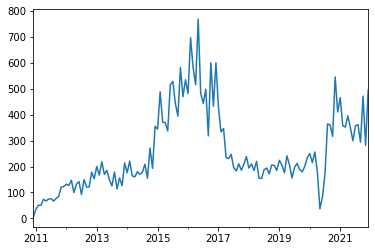

In [20]:
#Plot all loans over time
(df.loc[df['SETUP DATE'].dt.year.between(2010, 2022), 'SETUP DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

<AxesSubplot:>

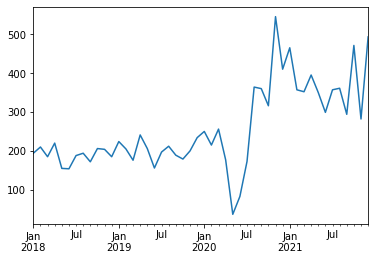

In [21]:
#Plot all loans over the last 3 years

(df.loc[df['SETUP DATE'].dt.year.between(2018, 2021), 'SETUP DATE']
         .dt.to_period('M')
         .value_counts()
         .sort_index()
         .plot(kind="line")
)

In [22]:
#Create dataframes for each loan purpose
EE_loans_df = df[(df["Purpose"] == 'Energy Efficiency (EE)')]
PV_loans_df = df[(df["Purpose"] == 'Solar (PV)')]
ASHP_loans_df = df[(df["Purpose"] == 'Air Source Heat Pump (ASHP)')]
GSHP_loans_df = df[(df["Purpose"] == 'Ground Source Heat Pump (GSHP)')]
RHNY_loans_df = df[(df["Purpose"] == 'Renewable Heat NY (RHNY)')]
ST_loans_df = df[(df["Purpose"] == 'Solar Thermal')]


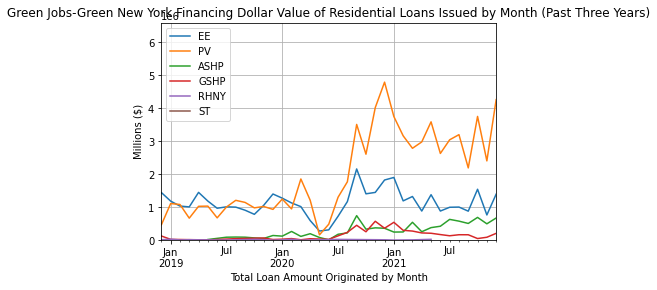

In [23]:
# create data by grouping on month and summing loan amounts
EE_loans_month = EE_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
PV_loans_month = PV_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ASHP_loans_month = ASHP_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
GSHP_loans_month = GSHP_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
RHNY_loans_month = RHNY_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ST_loans_month = ST_loans_df.groupby(['SETUP MONTH'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)

#Set figure Size and plot
ax = plt.gca()
EE_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
PV_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
ASHP_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
GSHP_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
RHNY_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )
ST_loans_month.plot( x = 'SETUP MONTH' , y = 'ORIGINAL LOAN AMOUNT', ax = ax )

#Add legend
ax.legend(["EE", "PV","ASHP", "GSHP","RHNY", "ST"]);

#Label axis
ax.set_xlabel("Total Loan Amount Originated by Month")
ax.set_ylabel("Millions ($)")

#Set Axis limits
plt.gca().set_xlim(left=three_years_prior_date)
plt.gca().set_ylim(bottom=0)

#Add a title.
ax.set_title("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Month (Past Three Years)")

# Add a grid.
ax.grid()


In [173]:
ax = plt.gca()


#Plot average int rate line
Avg_int_r = df.groupby(['SETUP_YEAR'])['INTEREST RATE'].mean()
#Avg_int_r.plot(kind='line')
ax = Avg_int_r['INTEREST RATE'].plot(kind='line')
#Avg_int_r = pd.DataFrame(Avg_int_r)

# create data by grouping on year and summing loan amounts
Years_total = df.groupby(['Purpose', 'SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().unstack('Purpose').fillna(0)

Years_total[['Air Source Heat Pump (ASHP)',
             'Energy Efficiency (EE)',
             'Ground Source Heat Pump (GSHP)',
             'Renewable Heat NY (RHNY)','Solar (PV)',
             'Solar Thermal']].plot(kind='bar', stacked=True, figsize=(15, 8))


#Label axis
plt.xlabel("Total Loan Amount Originated by Year")
plt.ylabel("Millions ($)")

#Add a title.
plt.title("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Year (Program to Date)")







KeyError: 'INTEREST RATE'

AttributeError: 'Rectangle' object has no property 'y1'

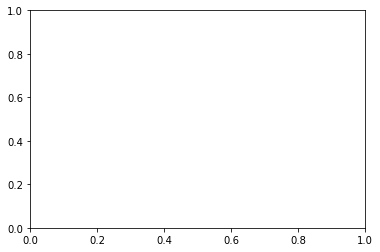

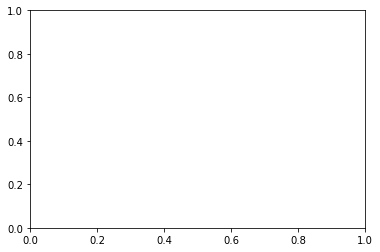

In [177]:
# create data by grouping on month and summing loan amounts
EE_loans_year = EE_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
PV_loans_year = PV_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ASHP_loans_year = ASHP_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
GSHP_loans_year = GSHP_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
RHNY_loans_year = RHNY_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)
ST_loans_year = ST_loans_df.groupby(['SETUP_YEAR'])['ORIGINAL LOAN AMOUNT'].sum().reset_index(level=0)

#Set figure Size and plot (Create subplots?)
ax = plt.gca()
EE_loans_year.plot( x = 'SETUP_YEAR' , y1 = 'ORIGINAL LOAN AMOUNT',kind='bar' )
PV_loans_year.plot( x = 'SETUP_YEAR' , y2 = 'ORIGINAL LOAN AMOUNT', kind='bar' )
ASHP_loans_year.plot( x = 'SETUP_YEAR' , y3 = 'ORIGINAL LOAN AMOUNT', kind='bar')
GSHP_loans_year.plot( x = 'SETUP_YEAR' , y4 = 'ORIGINAL LOAN AMOUNT', kind='bar' )
RHNY_loans_year.plot( x = 'SETUP_YEAR' , y5 = 'ORIGINAL LOAN AMOUNT', kind='bar' )
ST_loans_year.plot( x = 'SETUP_YEAR' , y6 = 'ORIGINAL LOAN AMOUNT', kind='bar' )

#Add legend
ax.legend(["EE", "PV","ASHP", "GSHP","RHNY", "ST"]);

#Label axis
ax.set_xlabel("Total Loan Amount Originated by Year")
ax.set_ylabel("Millions ($)")

#Set Axis limits
#plt.gca().set_xlim(left=three_years_prior_date)
#plt.gca().set_ylim(bottom=0)

#Add a title.
ax.set_title("Green Jobs-Green New York Financing Dollar Value of Residential Loans Issued by Month (Past Three Years)")

# Add a grid.
ax.grid()

In [122]:
Avg_int_r.columns

Index(['INTEREST RATE'], dtype='object')

In [78]:
Years_total

Purpose,Air Source Heat Pump (ASHP),Energy Efficiency (EE),Ground Source Heat Pump (GSHP),Renewable Heat NY (RHNY),Solar (PV),Solar Thermal
SETUP_YEAR,,,,,,
2010,0.00,53986.00,0.00,0.00,0.00,0.00
2011,0.00,7812428.48,0.00,0.00,0.00,0.00
2012,0.00,15853877.22,0.00,0.00,0.00,0.00
2013,0.00,19861298.93,0.00,0.00,0.00,0.00
2014,0.00,22614216.07,0.00,0.00,4221162.55,0.00
2015,0.00,31452280.14,0.00,73795.00,40830646.60,9725.00
2016,0.00,29207461.06,0.00,93002.41,54234334.60,59144.74
2017,0.00,15840827.37,0.00,68884.20,18036172.70,6680.00
2018,0.00,12441708.00,202395.00,134992.12,9498228.00,0.00


In [146]:
all_tot

,INTEREST RATE,Air Source Heat Pump (ASHP),Energy Efficiency (EE),Ground Source Heat Pump (GSHP),Renewable Heat NY (RHNY),Solar (PV),Solar Thermal
SETUP_YEAR,,,,,,,
2010,3.573333,NaN,NaN,NaN,NaN,NaN,NaN
2011,3.611951,NaN,NaN,NaN,NaN,NaN,NaN
2012,3.421034,NaN,NaN,NaN,NaN,NaN,NaN
2013,3.435582,NaN,NaN,NaN,NaN,NaN,NaN
2014,3.527623,NaN,NaN,NaN,NaN,NaN,NaN
2015,3.526306,NaN,NaN,NaN,NaN,NaN,NaN
2016,3.553261,NaN,NaN,NaN,NaN,NaN,NaN
2017,4.408888,NaN,NaN,NaN,NaN,NaN,NaN
2018,4.858549,NaN,NaN,NaN,NaN,NaN,NaN
